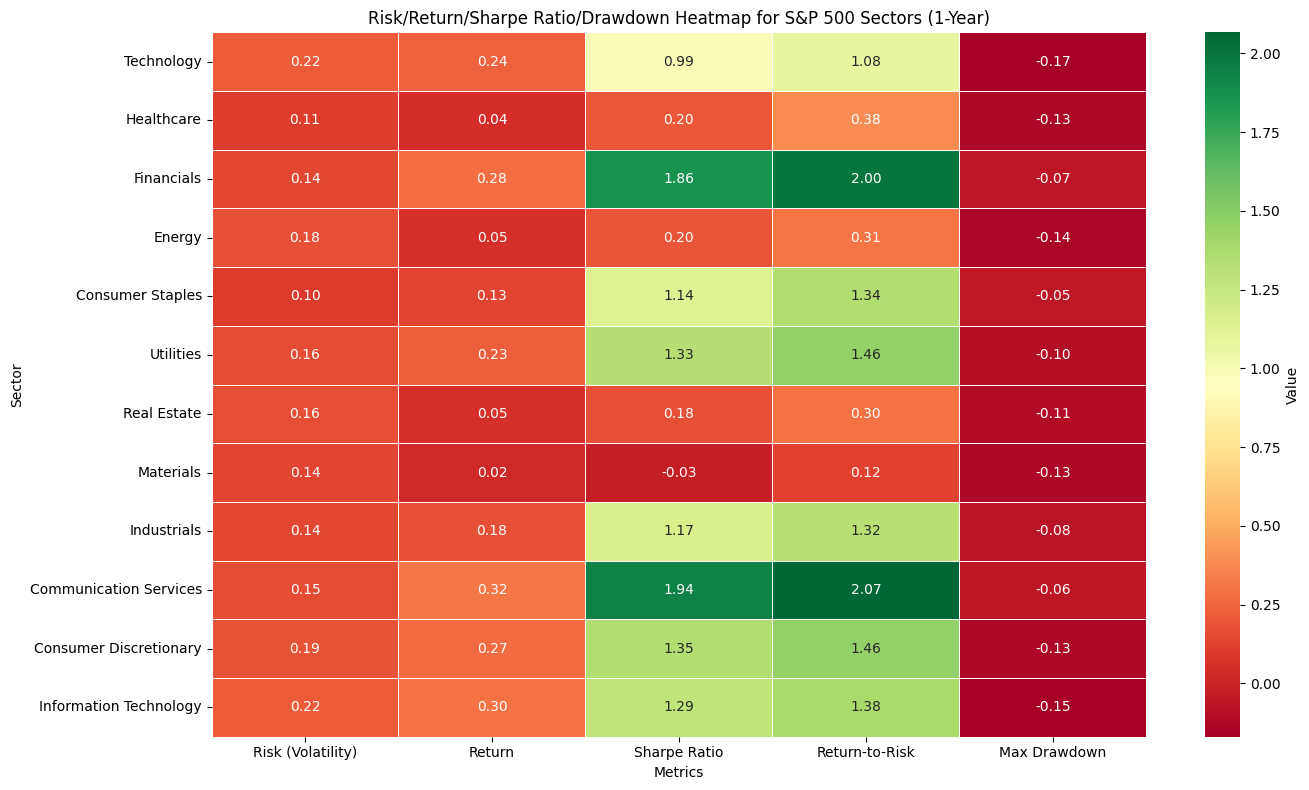

In [2]:
import yfinance as yf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define sector ETFs
sector_etfs = {
    'Technology': 'XLK',
    'Healthcare': 'XLV',
    'Financials': 'XLF',
    'Energy': 'XLE',
    'Consumer Staples': 'XLP',
    'Utilities': 'XLU',
    'Real Estate': 'XLRE',
    'Materials': 'XLB',
    'Industrials': 'XLI',
    'Communication Services': 'XLC',
    'Consumer Discretionary': 'XLY',
    'Information Technology': 'VGT'
}

# Fetch historical data for the last year
data = {}
for sector, ticker in sector_etfs.items():
    etf = yf.Ticker(ticker)
    data[sector] = etf.history(period="1y")['Close']

# Combine data into a single DataFrame
df = pd.DataFrame(data)

# Calculate daily percentage changes
returns = df.pct_change()

# Define the risk-free rate (e.g., 2% annualized)
risk_free_rate = 0.02

# Calculate risk (volatility) and return for each sector
risk_return = pd.DataFrame({
    "Risk (Volatility)": returns.std() * (252**0.5),  # Annualized standard deviation
    "Return": returns.mean() * 252,  # Annualized return
})

# Add Sharpe Ratio (Return minus Risk-Free Rate divided by Volatility)
risk_return["Sharpe Ratio"] = (risk_return["Return"] - risk_free_rate) / risk_return["Risk (Volatility)"]

# Add Return-to-Risk Ratio
risk_return["Return-to-Risk"] = risk_return["Return"] / risk_return["Risk (Volatility)"]

# Calculate Maximum Drawdown
def calculate_drawdown(prices):
    """Calculate the maximum drawdown."""
    cumulative_max = prices.cummax()
    drawdown = (prices / cumulative_max) - 1
    return drawdown.min()

risk_return["Max Drawdown"] = df.apply(calculate_drawdown, axis=0)

# Plot the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(
    risk_return,
    annot=True,
    fmt=".2f",
    cmap="RdYlGn",  # Green for higher values, red for lower values
    linewidths=0.5,
    cbar_kws={'label': 'Value'}
)

# Customize the plot
plt.title("Risk/Return/Sharpe Ratio/Drawdown Heatmap for S&P 500 Sectors (1-Year)")
plt.xlabel("Metrics")
plt.ylabel("Sector")
plt.tight_layout()

# Show the heatmap
plt.show()
